Idea: each stress testing should ouptut a score that, in the end, will be used to calculate the final score. If the strategy passes (>80% for example), then it will output a boolean which means that it will be used in the portfolio management module

In [406]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

df = yf.download('TSLA')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
2025-01-02 00:00:00+00:00,379.279999,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03 00:00:00+00:00,410.440002,410.440002,411.880005,379.450012,381.480011,95423300


In [407]:
import pandas as pd
returns = np.log(1 + df['Adj Close'].pct_change())
returns = returns.dropna()

In [257]:
mu, sigma = returns.mean(), returns.std()

In [258]:
sim_rets = np.random.normal(mu, sigma, 252)

In [259]:
initial_price = df['Adj Close'].iloc[-1].iloc[0]
initial_price

394.94000244140625

In [260]:
sim_prices = initial_price * np.exp(sim_rets.cumsum())
sim_prices_2 = initial_price * (sim_rets + 1).cumprod()

In [261]:
sim_prices

array([ 387.88967691,  396.28480726,  414.09489035,  422.17057623,
        420.17967363,  427.61048454,  424.13651427,  432.71588561,
        429.12477337,  445.15778541,  478.25255586,  469.18051997,
        472.70038791,  465.20040699,  468.46613654,  479.51193873,
        500.18330753,  506.01268933,  499.86704383,  515.76925672,
        509.00353046,  483.86084138,  521.02544511,  544.570748  ,
        561.22602416,  544.99603254,  565.14802698,  571.15189142,
        607.97890661,  577.88426259,  558.36947225,  592.9387257 ,
        591.70520558,  554.57316062,  559.21239563,  537.72021091,
        571.82166446,  577.60593623,  572.98949179,  577.80526409,
        576.6974981 ,  565.76173599,  534.8844772 ,  514.56368693,
        492.89974245,  504.21078565,  510.32949959,  532.4410113 ,
        543.04620901,  528.0006901 ,  551.71158461,  568.8722277 ,
        562.98755689,  542.9917596 ,  535.38094366,  568.40752493,
        568.92505007,  553.07235409,  599.43624809,  548.74794

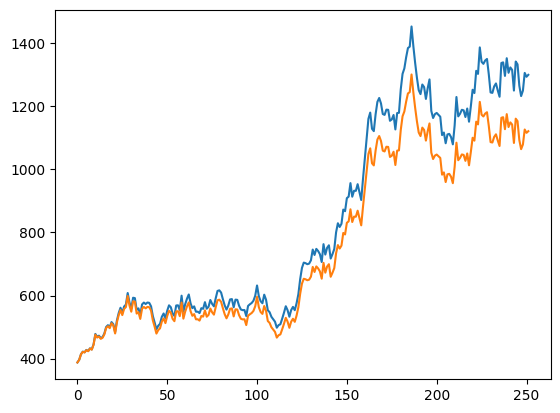

In [262]:
plt.plot(sim_prices)
plt.plot(sim_prices_2)

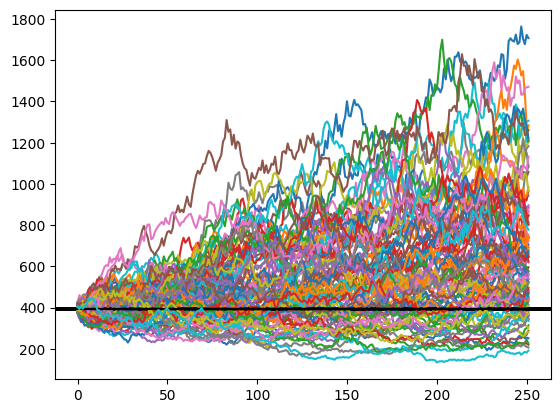

In [ ]:
normal_prices_df = pd.DataFrame()
num_simulations = 1000
for i in range(num_simulations):
    sim_rets = np.random.normal(mu, sigma, 252)
    sim_prices = initial_price * np.exp(sim_rets.cumsum())
    normal_prices_df[i] = sim_prices
    plt.axhline(initial_price, c = 'k')
    plt.plot(sim_prices)

In [270]:
normal_prices_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,390.765320,382.929726,408.823633,382.272492,406.327506,407.575436,412.869574,391.066505,372.571547,404.120836,...,380.192096,379.933927,390.069974,401.072756,400.242656,415.662903,387.386640,402.555447,389.473624,405.381233
1,379.692167,365.508777,414.205874,375.857571,396.041547,403.431735,405.897491,363.802144,363.126735,392.243777,...,369.954498,386.821617,365.445465,414.656131,391.137651,410.169804,390.867158,374.892684,384.907102,392.594845
2,390.688807,387.420389,423.681260,358.161792,388.257957,411.925522,422.192317,357.139756,366.273570,397.616113,...,337.011737,357.889642,354.821248,421.812134,410.797004,415.394850,389.309977,412.179128,384.061112,404.918987
3,404.133719,391.263218,392.894242,363.596884,381.323179,413.220029,407.993964,355.693474,361.158991,392.995544,...,330.985134,374.005577,357.111308,385.222955,399.945428,415.022359,398.231699,400.575686,415.910165,394.088341
4,386.846787,383.494002,375.987450,348.466592,384.073509,410.877663,425.193958,347.564532,358.133369,391.617534,...,311.720796,359.987305,344.318567,387.873438,400.947782,426.831693,406.178691,408.531584,410.563547,409.301302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,257.606993,519.658604,748.720805,618.721499,537.218470,250.764668,747.673881,1086.531314,1250.035519,552.360647,...,712.629813,440.719071,226.627775,388.001571,440.381771,454.188533,517.421413,476.241231,358.479930,170.511827
248,263.805563,496.342130,770.314830,614.115747,545.798724,258.944660,739.263560,1085.790447,1220.278390,528.868778,...,694.721804,431.765700,223.065606,440.121891,443.882484,455.643959,531.738704,484.994846,340.312603,178.194479
249,249.624445,494.957387,819.556654,599.335312,535.254715,261.877830,726.978252,1137.945488,1167.120299,553.899378,...,673.570092,437.537024,229.386391,464.219261,440.641282,478.579797,550.835260,488.548333,348.753662,184.933200
250,253.996372,521.883489,803.337767,581.099294,529.067414,267.566465,690.449197,1172.608066,1249.521662,573.261719,...,649.371664,434.348542,244.217371,506.894699,440.129237,492.748010,544.818521,503.887096,365.004553,180.819164


In [374]:
def normal_sims(returns, num_simulations):
    mu, sigma = returns.mean(), returns.std()
    normal_prices_df = pd.DataFrame()
    for i in range(num_simulations):
        sim_rets = np.random.normal(mu, sigma, 252)
        sim_prices = np.exp(sim_rets.cumsum())
        normal_prices_df[i] = sim_prices
        plt.axhline(initial_price, c = 'k')
        plt.plot(sim_prices)
    return normal_prices_df

---

Using the student-t distribution as it accounts for fat-tails

In [173]:
returns = returns.dropna()

(array([ 0.018042  ,  0.018042  ,  0.018042  ,  0.018042  ,  0.05412601,
         0.09021002,  0.09021002,  0.12629403,  0.14433603,  0.41496609,
         0.84797418,  1.17273025,  2.94084663,  5.66518922, 10.42827824,
        16.45430753, 12.50310869,  7.23484355,  3.84294683,  1.58769634,
         0.95622621,  0.4510501 ,  0.28867206,  0.16237803,  0.16237803,
         0.12629403,  0.05412601,  0.05412601,  0.018042  ,  0.018042  ]),
 array([-0.23651789, -0.22135755, -0.20619721, -0.19103686, -0.17587652,
        -0.16071618, -0.14555583, -0.13039549, -0.11523515, -0.1000748 ,
        -0.08491446, -0.06975412, -0.05459377, -0.03943343, -0.02427309,
        -0.00911274,  0.0060476 ,  0.02120794,  0.03636829,  0.05152863,
         0.06668898,  0.08184932,  0.09700966,  0.11217001,  0.12733035,
         0.14249069,  0.15765104,  0.17281138,  0.18797172,  0.20313207,
         0.21829241]),
 <BarContainer object of 30 artists>)

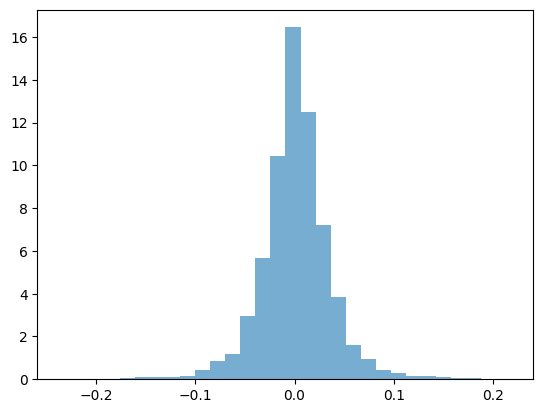

In [174]:
# 2. Distribution Fitting
# Empirical distribution
plt.hist(returns, bins=30, density=True, alpha=0.6, label='Empirical')

In [175]:
# T-distribution fit
df, loc, scale = stats.t.fit(returns)
df, loc, scale

(3.209824936249038, 0.00139997532381771, 0.02359091548235987)

In [176]:
x = np.linspace(returns.min(), returns.max(), 100)
x

array([[-0.23651789],
       [-0.23192385],
       [-0.22732981],
       [-0.22273576],
       [-0.21814172],
       [-0.21354768],
       [-0.20895363],
       [-0.20435959],
       [-0.19976555],
       [-0.1951715 ],
       [-0.19057746],
       [-0.18598342],
       [-0.18138937],
       [-0.17679533],
       [-0.17220129],
       [-0.16760724],
       [-0.1630132 ],
       [-0.15841916],
       [-0.15382511],
       [-0.14923107],
       [-0.14463702],
       [-0.14004298],
       [-0.13544894],
       [-0.13085489],
       [-0.12626085],
       [-0.12166681],
       [-0.11707276],
       [-0.11247872],
       [-0.10788468],
       [-0.10329063],
       [-0.09869659],
       [-0.09410255],
       [-0.0895085 ],
       [-0.08491446],
       [-0.08032042],
       [-0.07572637],
       [-0.07113233],
       [-0.06653829],
       [-0.06194424],
       [-0.0573502 ],
       [-0.05275616],
       [-0.04816211],
       [-0.04356807],
       [-0.03897402],
       [-0.03437998],
       [-0

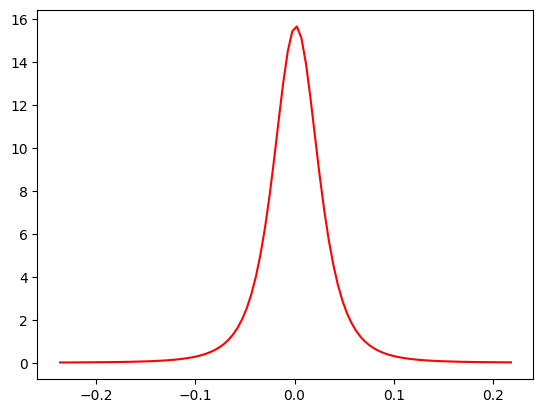

In [177]:
plt.plot(x, stats.t.pdf(x, df, loc, scale), 'r-', label='T-Distribution Fit')

In [178]:
# Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(returns.dropna(), lambda x: stats.t.cdf(x, df, loc, scale))
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")

KS Statistic: [0.01344701], P-value: [0.51864429]


In [179]:
simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size = len(returns))

In [180]:
simulated_returns

array([ 0.00534392, -0.01094066,  0.01541678, ..., -0.00514725,
        0.02737602, -0.0118183 ])

In [181]:
simulated_cumulative_returns = np.exp(simulated_returns.cumsum())

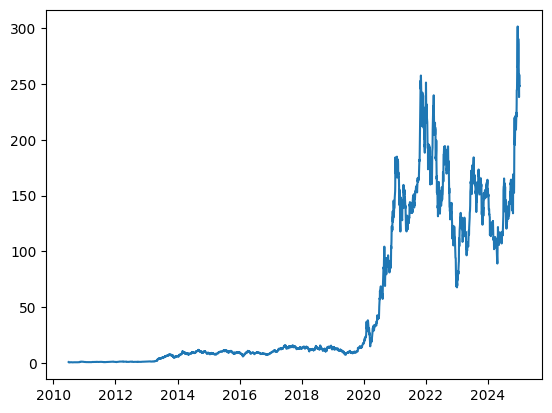

In [185]:
plt.plot(np.exp(returns.cumsum()))

Monte-Carlo using the t-distribution

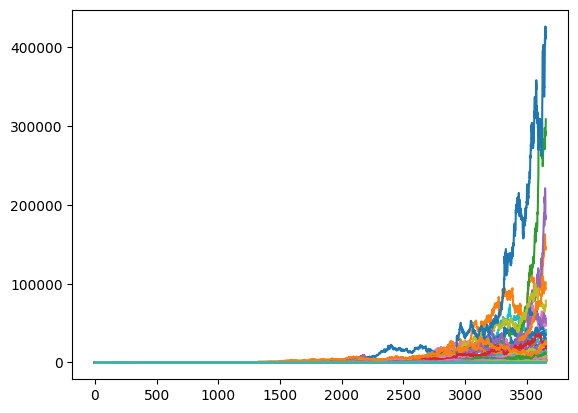

In [278]:
# Monte Carlo Simulation (Parametric Bootstrap)
df, loc, scale = stats.t.fit(returns)
num_simulations = 1000
simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(num_simulations, len(returns)))
simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
simulated_prices_df = pd.DataFrame(simulated_cumulative_returns)
for i in range(num_simulations):
    plt.plot(simulated_cumulative_returns[i, :])

In [375]:
def t_sims(returns, num_simulations):
    df, loc, scale = stats.t.fit(returns)
    simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(num_simulations, len(returns)))
    simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
    simulated_prices_df = pd.DataFrame(simulated_cumulative_returns)
    for i in range(num_simulations):
        plt.plot(simulated_cumulative_returns[i, :])

In [384]:
# 2. Define the Performance Metric Functions

def max_drawdown_fnct(prices):
    """Calculate the maximum drawdown (peak to trough)."""
    drawdowns = (prices / prices.cummax() - 1)
    return drawdowns.min()

def average_drawdown(prices):
    """Calculate the average drawdown (peak to trough)."""
    drawdowns = (prices / prices.cummax() - 1)
    return drawdowns.mean()

def average_drawdown_duration(prices):
    """Calculate the average duration of drawdowns."""
    drawdowns = (prices / prices.cummax() - 1)
    drawdown_durations = []
    drawdown_start = None
    for i in range(1, len(drawdowns)):
        if drawdowns[i] < 0:
            if drawdown_start is None:
                drawdown_start = i
        else:
            if drawdown_start is not None:
                drawdown_durations.append(i - drawdown_start)
                drawdown_start = None
    return np.mean(drawdown_durations) if drawdown_durations else 0

def sharpe_ratio_fnct(prices, risk_free_rate=0):
    """Calculate the Sharpe ratio."""
    returns = prices.pct_change().dropna()
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else 0

In [385]:
# 3. Calculate Metrics for Each Simulation
metrics = {
    'max_drawdown': [],
    'avg_drawdown': [],
    'avg_drawdown_duration': [],
    'sharpe_ratio': [],
}

# Calculate metrics for each simulation path
for i in range(num_simulations):
    sim_prices = simulated_prices_df.iloc[:, i]  # Get the i-th column (price path)
    metrics['max_drawdown'].append(max_drawdown_fnct(sim_prices))
    metrics['avg_drawdown'].append(average_drawdown(sim_prices))
    metrics['avg_drawdown_duration'].append(average_drawdown_duration(sim_prices))
    metrics['sharpe_ratio'].append(sharpe_ratio_fnct(sim_prices))

# 4. Convert metrics to a DataFrame for easy handling
metrics_df = pd.DataFrame(metrics)


In [388]:
def metrics_df_fnct(df, num_simulations):
    metrics = {
        'max_drawdown': [],
        'avg_drawdown': [],
        'avg_drawdown_duration': [],
        'sharpe_ratio': [],
    }

    # Calculate metrics for each simulation path
    for i in range(num_simulations):
        sim_prices = df.iloc[:, i]  # Get the i-th column (price path)
        metrics['max_drawdown'].append(max_drawdown_fnct(sim_prices))
        metrics['avg_drawdown'].append(average_drawdown(sim_prices))
        metrics['avg_drawdown_duration'].append(average_drawdown_duration(sim_prices))
        metrics['sharpe_ratio'].append(sharpe_ratio_fnct(sim_prices))

    # Convert metrics to a DataFrame for easy handling
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [326]:
metrics_df.describe()

,max_drawdown,avg_drawdown,avg_drawdown_duration,sharpe_ratio
count,100.000000,100.000000,100.000000,100.000000
mean,-0.399602,-0.159110,16.799643,0.064429
std,0.103527,0.081060,17.238850,0.052754
min,-0.707188,-0.466954,1.000000,-0.068050
25%,-0.469720,-0.184384,8.696429,0.031249
50%,-0.389660,-0.138093,12.632353,0.067780
75%,-0.317016,-0.103759,19.909091,0.100187
max,-0.178518,-0.048977,148.000000,0.183425


In [357]:
# Example Scoring (Adapt weights and targets to your needs)
def score_strategy(mdd, avg_dd, sharpe, recovery):
    weights = [0.25, 0.25, 0.25, 0.25]
    mdd_score = 100 - (abs(mdd) / 0.50) * 100
    avg_dd_score = 100 - (abs(avg_dd) / 0.25) * 100
    avg_dd_duration_score = 100 - (abs(recovery) / 50) * 100
    sharpe_score = (sharpe) / 0.5 * 100
    total_score = np.dot(weights, [mdd_score, avg_dd_score, avg_dd_duration_score, sharpe_score])
    return total_score

mdd = metrics_df['max_drawdown'].mean()
avg_dd = metrics_df['avg_drawdown'].mean()
sharpe = metrics_df['sharpe_ratio'].mean()
recovery = metrics_df['avg_drawdown_duration'].mean()

overall_score = score_strategy(mdd, avg_dd, sharpe, recovery)
print(f"Average Max Drawdown: {mdd}")
print(f"Average Drawdown: {avg_dd}")
print(f"Average Recovery Time: {recovery}")
print(f"Sharpe Ratio: {sharpe}")
print(f"Overall Score: {overall_score}")

Average Max Drawdown: -0.3996023693451768
Average Drawdown: -0.15910952955832997
Average Recovery Time: 16.799643472892345
Sharpe Ratio: 0.06442900288196197
Overall Score: 33.93055698456009


In [329]:
confidence_level = 0.95
lower_bound_mdd = np.percentile(mdd, (1-confidence_level)/2 * 100)
upper_bound_mdd = np.percentile(mdd, (1+confidence_level)/2 * 100)
print(f"{confidence_level*100:.0f}% confidence interval for Max Drawdown: [{lower_bound_mdd:.4f}, {upper_bound_mdd:.4f}]")

95% confidence interval for Max Drawdown: [-0.3996, -0.3996]


---

Using Block Bootstrapping, a shuffling method that keeps the autocorrelation of the data

In [ ]:
# Parameters
block_size = 5
num_iterations = 100
resampled_series = []

for _ in range(num_iterations):
    # Create overlapping blocks
    blocks = [returns[i:i + block_size] for i in range(len(returns) - block_size + 1)]
    # Randomly sample blocks
    sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(returns) // block_size + 1)]
        #Shuffles the blocks, with replacement 
    # Concatenate and truncate
    resampled = np.concatenate(sampled_blocks)[:len(returns)]
    resampled_series.append(resampled)

# Analyze resampled series (e.g., calculate mean, variance, etc.)
bootstrap_means = [np.mean(series) for series in resampled_series]
print("Bootstrap Mean Estimate:", np.mean(bootstrap_means))

Bootstrap Mean Estimate: 0.00275487152411103


In [378]:
def block_bootstrap(returns, block_size, num_iterations):
    resampled_series = []
    for _ in range(num_iterations):
        blocks = [returns[i:i + block_size] for i in range(len(returns) - block_size + 1)]
        sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(returns) // block_size + 1)]
        resampled = np.concatenate(sampled_blocks)[:len(returns)]
        resampled_cum = np.exp(resampled.cumsum())
        resampled_series.append(resampled_cum)
    return pd.DataFrame(resampled_series)


# Parameters
block_size = 20  # A common value for daily data is around 20 (roughly a month)
num_iterations = 100

bootstrapped_returns = block_bootstrap(returns, block_size, num_iterations)

In [379]:
bootstrapped_returns

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,1.064516,1.012519,1.047767,1.113208,1.050185,1.033810,1.088135,1.044115,1.082499,1.048705,...,19.193626,18.470222,18.797164,18.209530,19.039569,20.711453,18.708156,19.210317,18.253419,18.619861
1,1.021884,1.023427,1.022416,0.919134,0.932851,0.985182,1.016467,0.959249,0.999313,0.962580,...,14.683103,14.482770,15.394129,15.722147,15.130017,14.961320,16.233574,15.076180,15.744203,14.424961
2,0.940791,1.000213,0.991914,0.978760,0.957356,0.948018,0.971124,0.968060,0.971576,0.971789,...,17.431942,19.070904,18.985720,18.829498,18.534980,18.622442,18.386631,20.381942,18.699005,18.887308
3,0.927146,1.096638,0.995133,1.128453,0.894389,1.185903,1.263744,1.222462,1.233133,1.248467,...,10.679926,11.099847,10.654098,11.249345,11.312223,10.955282,10.407643,10.662969,11.427157,10.594061
4,0.949032,0.931330,1.010733,1.046393,1.063215,1.038400,1.021425,0.947846,1.120469,0.990268,...,8.011995,8.503362,7.381805,8.019132,8.137767,8.304053,8.138582,8.039698,8.150071,8.421525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.859849,1.111710,0.946945,0.989107,1.066510,1.457892,1.089593,1.225260,1.170288,1.144058,...,7.965895,9.675749,8.847711,7.947362,7.901394,8.959274,8.752854,8.945322,9.681761,8.518393
96,1.001116,1.057489,1.005974,1.040024,1.054470,1.003233,1.019540,1.016307,1.043907,1.008018,...,5.320660,5.327965,5.784611,5.780767,5.466691,6.162889,5.715458,5.567609,5.477091,6.254550
97,0.918885,1.020061,0.969789,0.972266,0.942904,0.984782,0.928812,1.024610,1.029804,1.019660,...,4.744067,4.839777,4.767036,4.701137,5.162660,4.634104,5.288207,5.157772,5.148539,4.967317
98,0.934379,1.054082,0.891310,1.434023,1.147111,1.092880,1.159906,1.006919,1.093854,1.110036,...,11.368595,11.322238,11.487985,11.297324,12.245377,11.458684,11.938733,12.451873,10.764962,13.133931


In [389]:
metrics_df = metrics_df_fnct(bootstrapped_returns, num_iterations)

In [390]:
mdd = metrics_df['max_drawdown'].mean()
avg_dd = metrics_df['avg_drawdown'].mean()
sharpe = metrics_df['sharpe_ratio'].mean()
recovery = metrics_df['avg_drawdown_duration'].mean()

overall_score = score_strategy(mdd, avg_dd, sharpe, recovery)

In [391]:
overall_score

12.70929068773567

In [397]:
mdd

-0.6420036321091181

In [400]:
def confidence_interval_fnct(metric, confidence_level):
    lower_bound = np.percentile(metric, (1-confidence_level)/2 * 100)
    upper_bound = np.percentile(metric, (1+confidence_level)/2 * 100)
    return lower_bound, upper_bound

confidence_interval_fnct(metrics_df['max_drawdown'].abs(), 0.95)

(0.3321199087063821, 0.7857333568292244)

In [415]:
import numpy as np
import scipy.stats as st

def calculate_var(returns, confidence_level=0.95, method="historical"):
    """Calculates Value at Risk (VaR).

    Args:
        returns (array-like): Array of returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% VaR).
        method (str): Calculation method ("historical", "parametric").

    Returns:
        float: VaR value.
    """
    if method == "historical":
        # Historical Simulation
        var = np.quantile(returns, 1 - confidence_level)  #Quantile function is used for VaR
    elif method == "parametric":
        # Variance-Covariance Method (assuming normal distribution)
        mu = np.mean(returns)
        sigma = np.std(returns)
        var = st.norm.ppf(1 - confidence_level, mu, sigma)[0]
    else:
        raise ValueError("Invalid VaR method.")
    return var


var_historical = calculate_var(returns, method="historical")
var_parametric = calculate_var(returns, method="parametric")
var_historical, var_parametric

(-0.0525701153045228, -0.057709103430116544)

In [416]:
def calculate_cvar(returns, confidence_level=0.95):
    """Calculates Conditional Value at Risk (CVaR).

    Args:
        returns (array-like): Array of returns.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% CVaR).

    Returns:
        float: CVaR value.
    """
    var = np.quantile(returns, 1 - confidence_level)
    cvar = np.mean(returns[returns <= var])
    return cvar

# Example usage (using the same random returns):
cvar = calculate_cvar(returns)
print(f"CVaR (95%): {cvar:.4f}")

CVaR (95%): -0.0822


Putting all together in functions

In [446]:
class Returns_Metrics():
    def __init__(self, prices):
       self.prices = prices
    
    # 2. Define the Performance Metric Functions
    def max_drawdown_fnct(self):
        """Calculate the maximum drawdown (peak to trough)."""
        drawdowns = (self.prices / self.prices.cummax() - 1)
        return drawdowns.min()

    def average_drawdown(self):
        """Calculate the average drawdown (peak to trough)."""
        drawdowns = (self.prices / self.prices.cummax() - 1)
        return drawdowns.mean()

    def average_drawdown_duration(self):
        """Calculate the average duration of drawdowns."""
        drawdowns = (self.prices / self.prices.cummax() - 1)
        drawdown_durations = []
        drawdown_start = None
        for i in range(1, len(drawdowns)):
            if drawdowns[i] < 0:
                if drawdown_start is None:
                    drawdown_start = i
            else:
                if drawdown_start is not None:
                    drawdown_durations.append(i - drawdown_start)
                    drawdown_start = None
        return np.mean(drawdown_durations) if drawdown_durations else 0

    def sharpe_ratio_fnct(self, risk_free_rate=0):
        """Calculate the Sharpe ratio."""
        returns = self.prices.pct_change().dropna()
        excess_returns = returns - risk_free_rate
        return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else 0
    
    def var(self, confidence_level):
        return np.quantile(self.prices, 1 - confidence_level)
    
    def cvar(self, confidence_level):
        var = np.quantile(self.prices, 1 - confidence_level)
        return np.mean(self.prices[self.prices <= var])
    
    def confidence_interval_fnct(self, metric_series, confidence_level):
        lower_bound = np.percentile(metric_series, (1-confidence_level)/2 * 100)
        upper_bound = np.percentile(metric_series, (1+confidence_level)/2 * 100)
        return lower_bound, upper_bound

In [461]:
class Stress_Test():
    def __init__(self, returns, num_simulations, confidence_level):
        self.returns = returns
        self.num_simulations = num_simulations
        self.confidence_level = confidence_level
        
    def normal_sims(self):
        mu, sigma = self.returns.mean(), self.returns.std()
        normal_prices_df = pd.DataFrame()
        for i in range(self.num_simulations):
            sim_rets = np.random.normal(mu, sigma, 252)
            sim_prices = np.exp(sim_rets.cumsum())
            normal_prices_df[i] = sim_prices
            plt.axhline(initial_price, c = 'k')
            plt.plot(sim_prices)
        return normal_prices_df
    
    def t_sims(self):
        df, loc, scale = stats.t.fit(self.returns)
        simulated_returns = stats.t.rvs(df, loc=loc, scale=scale, size=(self.num_simulations, len(self.returns)))
        simulated_cumulative_returns = np.exp(simulated_returns.cumsum(axis=1))
        simulated_prices_df = pd.DataFrame(simulated_cumulative_returns)
        for i in range(self.num_simulations):
            plt.plot(simulated_cumulative_returns[i, :])
        return simulated_prices_df
    
    def block_bootstrap(self, block_size):
        resampled_series = []
        for _ in range(self.num_simulations):
            blocks = [self.returns[i:i + block_size] for i in range(len(self.returns) - block_size + 1)]
            sampled_blocks = [blocks[np.random.randint(0, len(blocks))] for _ in range(len(self.returns) // block_size + 1)]
            resampled = np.concatenate(sampled_blocks)[:len(self.returns)]
            resampled_cum = np.exp(resampled.cumsum())
            resampled_series.append(resampled_cum)
        return pd.DataFrame(resampled_series)
    
    def metrics_df_fnct(self, sims_df):
        metrics_dict = {
            'max_drawdown': [],
            'avg_drawdown': [],
            'avg_drawdown_duration': [],
            'sharpe_ratio': [],
            'var': [],
            'cvar': []
        }
        

        # Calculate metrics for each simulation path
        for i in range(self.num_simulations):
            sim_prices = sims_df.iloc[:, i]  # Get the i-th column (price path)
            metrics = Returns_Metrics(sim_prices)
            metrics_dict['max_drawdown'].append(metrics.max_drawdown_fnct())
            metrics_dict['avg_drawdown'].append(metrics.average_drawdown())
            metrics_dict['avg_drawdown_duration'].append(metrics.average_drawdown_duration())
            metrics_dict['sharpe_ratio'].append(metrics.sharpe_ratio_fnct())
            metrics_dict['var'].append(metrics.var(self.confidence_level))
            metrics_dict['cvar'].append(metrics.cvar(self.confidence_level))
        
        # Convert metrics to a DataFrame for easy handling
        metrics_df = pd.DataFrame(metrics_dict)
        return metrics_df
    
    def score_strategy(self, metrics_df):
        mdd = metrics_df['max_drawdown'].mean()
        avg_dd = metrics_df['avg_drawdown'].mean()
        sharpe = metrics_df['sharpe_ratio'].mean()
        recovery = metrics_df['avg_drawdown_duration'].mean()
        var = metrics_df['var'].mean()
        cvar = metrics_df['cvar'].mean()
        
        
        weights = [1 / len(metrics_df.columns)] * len(metrics_df.columns)
        mdd_score = 100 - (abs(mdd) / 0.50) * 100
        avg_dd_score = 100 - (abs(avg_dd) / 0.25) * 100
        avg_dd_duration_score = 100 - (abs(recovery) / 50) * 100
        sharpe_score = (sharpe) / 0.5 * 100
        var_score = 100 - abs(var) / 0.2 * 100
        cvar_score = 100 - abs(cvar) / 0.2 * 100
        
        total_score = np.dot(weights, [mdd_score, avg_dd_score, avg_dd_duration_score, sharpe_score, var_score, cvar_score])
        return total_score    
        

In [464]:
stress_test = Stress_Test(returns, 1000, 0.95)

In [465]:
sims = stress_test.block_bootstrap(20)

In [466]:
sims

,0,1,2,3,4,5,6,7,8,9,...,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655
0,0.951672,0.962418,0.996958,0.960517,0.979327,1.002594,0.952910,0.983705,0.980068,0.973213,...,4.810758,4.966130,5.231311,5.238972,5.389506,5.709121,5.619473,5.863149,6.223220,6.449558
1,1.005461,1.028564,1.031169,1.022431,1.042342,1.087037,1.130975,1.106780,1.128119,1.138789,...,29.097993,28.934999,29.524993,28.367961,29.212778,28.987799,29.454973,30.009386,29.061261,28.521772
2,1.078403,0.994057,1.040929,1.047020,1.035488,1.012401,1.034937,1.042167,1.035476,1.037498,...,537.099977,525.609535,535.743447,540.810460,550.585321,577.236852,567.142834,535.543974,612.346665,610.431553
3,1.045856,1.012105,0.993117,0.976692,0.979208,1.016377,0.999715,1.041536,1.092614,1.000332,...,363.324447,367.874188,379.640723,383.510595,380.791235,343.713555,339.948257,351.767099,346.825156,345.609290
4,0.950749,0.968172,1.019767,1.020828,0.968824,0.947410,0.908220,0.844663,0.885269,0.895329,...,34.352271,34.176418,34.566751,35.288456,35.025185,35.579174,35.735711,35.860740,35.159364,34.320758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.987961,1.003683,1.028629,1.134538,1.151818,1.380971,1.570518,1.300768,1.326015,1.324440,...,712.676352,725.472668,691.997832,691.173303,663.379286,679.720933,708.224062,691.181531,655.769132,631.875001
996,0.987568,0.994220,1.010088,1.028628,1.040951,1.054419,1.052402,0.986695,0.945035,0.986859,...,429.096205,425.257452,418.898945,407.145901,408.904649,392.873129,376.368115,357.715456,363.465144,353.301727
997,0.966094,1.005731,0.991882,0.948902,0.934097,0.959885,0.980420,1.021968,1.049665,0.974690,...,208.215788,197.401850,201.196229,218.768882,216.990267,213.290757,207.717780,206.887772,219.907194,230.223124
998,1.078403,0.994057,1.040929,1.047020,1.035488,1.012401,1.034937,1.042167,1.035476,1.037498,...,103.776826,103.315194,101.246893,97.015263,98.160294,94.969597,94.535118,93.684269,92.344629,89.525047


In [467]:
metrics_df = stress_test.metrics_df_fnct(sims)
score = stress_test.score_strategy(metrics_df)

In [468]:
metrics_df.describe()

,max_drawdown,avg_drawdown,avg_drawdown_duration,sharpe_ratio,var,cvar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.969795,-0.840084,69.740724,0.265065,0.610276,0.469113
std,0.072850,0.121196,33.322891,0.057503,0.062073,0.082338
min,-0.999707,-0.946452,5.000000,0.022684,0.534071,0.407738
25%,-0.998283,-0.916710,38.857143,0.223810,0.566151,0.424965
50%,-0.994526,-0.878031,67.714286,0.285304,0.592683,0.439859
75%,-0.979093,-0.815584,94.600000,0.306236,0.638720,0.455989
max,-0.272322,-0.110372,330.333333,0.346429,0.950421,0.924760


In [469]:
score

-109.35920399408803